University of Zagreb  
Faculty of Electrical Engineering and Computing 
  
## Machine Learning 1 2025/2026  
http://www.fer.unizg.hr/en/course/maclea1

------------------------------

### Second lab assignment: Linear Discriminative Models and Logistic Regression

*Version: 1.1*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić  

------------------------------

### Submission rules
By submitting the exercise, you confirm the following points:
1. You did not receive help from another when solving the exercise;
2. You attributed parts of the code that were taken from the Internet by referencing them in comments;
3. You did not use parts of the code from the Internet that are specific to the laboratory exercise;
4. You have not used UI-assistants for coding such as GitHub Copilot (including generative UI tools such as ChatGPT).

**Violation of any of the above rules is considered a misdemeanor and results in academic sanctions.**

### Instructions

The second lab assignment consists of six tasks. Follow the instructions in the text cells below. Solving the lab assignment boils down to **supplementing this notebook**: inserting one or more cells **below** the text of the task, writing the appropriate code, and executing the cells.

Make sure you fully understand the code you've written. When submitting the assignment, you must be able to modify and re-execute your code at the request of the teaching assistant. Furthermore, you need to understand the theoretical basis of what you are doing, within the framework of what we covered in the lecture. Below some tasks you can also find questions that serve as guidelines for a better understanding of the material (**do not write** the answers to the questions in the notebook). Therefore, do not limit yourself only to solving the tasks, but feel free to experiment. This is precisely the purpose of these assignments.

You should do the assignment **independently**. You can consult others on the principle way of solving it, but ultimately you have to do the assignment yourself. Otherwise, the assignment makes no sense.

In [4]:
# Load the core libraries...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the datasethttp://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linear regression as a classifier

In the previous lab exercise, we used a linear regression model for, of course, regression. However, the linear regression model can also be used for **classification**. Although it sounds a bit counterintuitive, it's actually quite simple. Namely, the goal is to learn the function $f(\mathbf{x})$ which predicts the value $1$ for positive examples, while it predicts the value $0$ for negative examples. In this case, the function $f(\mathbf{x})=0.5$ represents the boundary between the classes, i.e., examples for which $h(\mathbf{x})\geq 0.5$ is valid are classified as positive, while the rest are classified as negative.

Classification using linear regression is implemented in the class [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). In the following subtasks, **train** that model on the given data and **display** the obtained boundary between classes. In doing so, turn off regularization ($\alpha = 0$, i.e. `alpha=0`). Also, print the **accuracy** of your classification model (you can use the function [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Visualize the data sets using the helper function ``plot_clf_problem(X, y, h=None)`` given at the beginning of this notebook. `X` and `y` represent the input examples and labels, while `h` represents the model prediction function (e.g., `model.predict`).

In this task, the goal is to consider how the classification model of linear regression behaves on linearly separable and non-separable data.

In [9]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

First, try out the *built-in* model on a linearly separable dataset `seven` ($N=7$).

In [10]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

pred :  [1 1 1 1 0 0 0]
acc :  1.0


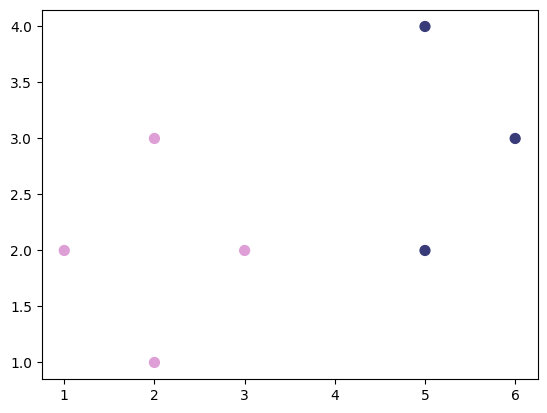

In [12]:
model = RidgeClassifier(alpha=0.0).fit(seven_X, seven_y)
y_prediction = model.predict(seven_X)
accuracy = accuracy_score(seven_y, y_prediction)
print("pred : ", y_prediction)
print("acc : ", accuracy)
plot_2d_clf_problem(seven_X, y_prediction)

To make sure that the implementation you tried is nothing more than simple linear regression, write code that arrives at an equivalent solution using only the [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class. You can define the prediction function, which you pass as the third argument `h` to the `plot_2d_clf_problem` function, with a lambda-expression: `lambda x : model.predict(x) >= 0.5`.

pred :  [ True  True  True  True False False False]
acc :  1.0


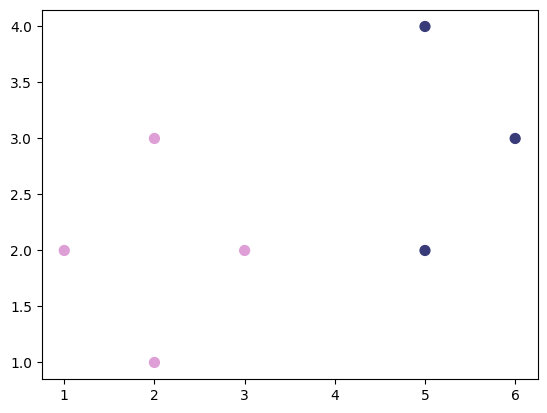

In [20]:
model = LinearRegression().fit(seven_X, seven_y)
y2_prediction = model.predict(seven_X)
y2_prediction = (y2_prediction >= 0.5)
accuracy2 = accuracy_score(seven_y, y2_prediction)
print("pred : ", y2_prediction)
print("acc : ", accuracy)
plot_2d_clf_problem(seven_X, y2_prediction)

**Q:** How would the boundary between classes be defined if we used the class labels $-1$ and $1$ instead of $0$ and $1$?

### (b)  

Try the same on the linearly separable data set `outlier` ($N=8$):

In [22]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

classifier
pred :  [1 1 1 1 0 1 0 0]
acc :  0.875


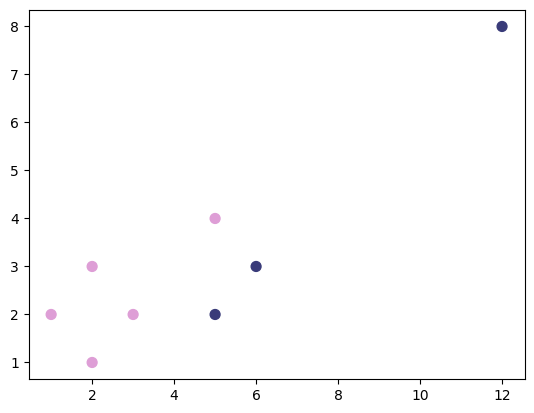

In [27]:
#classifier
print("classifier")
model = RidgeClassifier(alpha=0.0).fit(outlier_X, outlier_y)
y_prediction = model.predict(outlier_X)
accuracy = accuracy_score(outlier_y, y_prediction)
print("pred : ", y_prediction)
print("acc : ", accuracy)
plot_2d_clf_problem(outlier_X, y_prediction)


**Q:** Why doesn't the model achieve complete accuracy even though the data is linearly separable?

### (c)  

Finally, try the same on the linearly inseparable data set `unsep` ($N=8$):

In [ ]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

regression
pred :  [ True  True  True  True False  True False False]
acc :  0.875


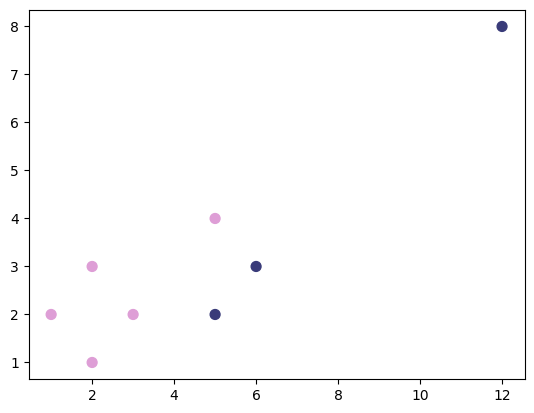

In [26]:
#linear regression 
print("regression")
model2 = LinearRegression().fit(outlier_X, outlier_y)
y2_prediction = model2.predict(outlier_X)
y2_prediction = (y2_prediction >= 0.5)
accuracy2 = accuracy_score(outlier_y, y2_prediction)
print("pred : ", y2_prediction)
print("acc : ", accuracy)
plot_2d_clf_problem(outlier_X, y2_prediction)

**Q:** It is obvious why the model is not able to achieve full accuracy on this data set. However, do you think the problem is in the model or in the data? Explain.

### 2. Mutliclass classification

There are several ways that binary classifiers can be used for multiclass classification. The most commonly used scheme is the so-called **one-vs-rest** (eng. *one-vs-rest*, OVR), in which one classifier $h_j$ is trained for each of the $K$ classes. Each classifier $h_j$ is trained to separate examples of class $j$ from examples of all other classes, and the example is classified into the class $j$ for which $h_j(\mathbf{x})$ is maximal.

Use the [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to generate a three-class random two-dimensional dataset and display it using the `plot_2d_clf_problem` function. For simplicity, assume that there are no redundant features and that each of the classes is "packed" into exactly one group.

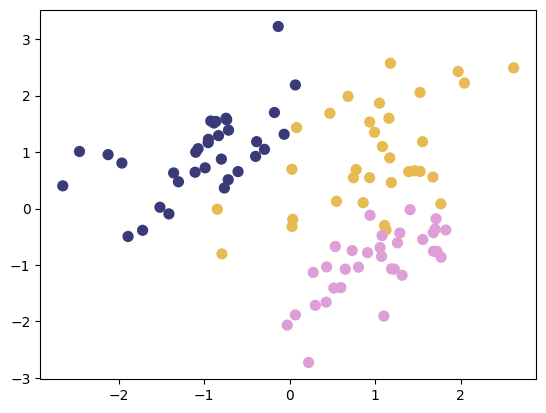

In [35]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plot_2d_clf_problem(X, y)
# Your code here

Train three binary classifiers, $h_1$, $h_2$, and $h_3$, and display the boundaries between the classes (three graphs). Then define $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ (write your own `predict` function that does this) and display the class boundaries for that model. Then make sure that you would get an identical result by applying the `RidgeClassifier` model directly, since that model actually internally implements a one-versus-other scheme for a multi-class problem.

**Q:** An alternative scheme is the one called **one-vs-one** (engl, *one-vs-one*, OVO). What is the advantage of the OVR scheme over the OVO scheme? And vice versa?

ovr:  [0 2 0 0 0 0 2 1 1 1 0 1 0 0 0 1 0 1 2 2 2 2 2 0 1 1 2 2 2 2 2 2 1 2 2 1 1
 2 0 2 0 0 2 2 1 1 0 2 1 1 0 2 0 0 2 1 2 2 0 0 1 2 2 2 2 0 0 2 0 2 2 1 2 2
 2 0 1 2 0 1 0 0 0 0 2 0 1 0 0 0 1 2 2 2 0 0 2 0 0 0]


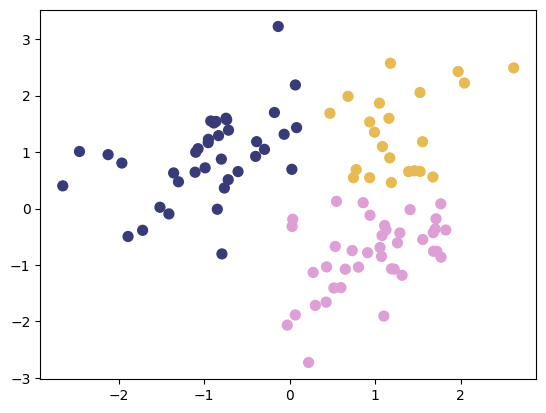

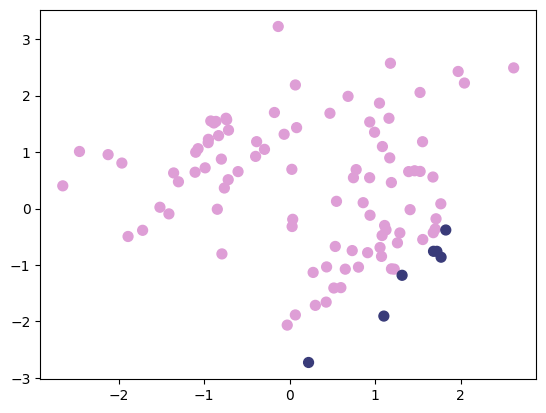

In [59]:
classifiers = []
classifiers.append(RidgeClassifier(alpha=0.0).fit(X,(y == 0).astype(int)))
classifiers.append(RidgeClassifier(alpha=0.0).fit(X,(y == 1).astype(int)))
classifiers.append(RidgeClassifier(alpha=0.0).fit(X,(y == 2).astype(int)))

for classifier in (classifiers):
    y_prediction = classifier.predict(X)
    #plot_2d_clf_problem(X, y_prediction)
    #plt.figure()
    
def predict_OVR (X):
    scores = []
    for classifier in (classifiers):
        scores.append(classifier.decision_function(X))
    scores = np.column_stack(scores)
    return np.argmax(scores, axis=1)

#Using custom predict 
y_pred_ovr = predict_OVR(X)
print("ovr: ",y_pred_ovr)
plot_2d_clf_problem(X, y_pred_ovr)
plt.figure()

#Using ridge 
RidgeClassifier(alpha=0.0).fit(X,y)
y_prediction = model.predict(X)
plot_2d_clf_problem(X, y_prediction)
  

### 3. Logistic regression

This task deals with a probabilistic discriminative model, **logistic regression**, which, despite its name, is a classification model.

Logistic regression is a typical representative of the so-called **generalized linear models** which are of the form: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. The logistic function for the function $f$ uses the so-called **logistic** (sigmoidal) function $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Define the logistic (sigmoidal) function $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ and show it for $\alpha\in\{1,2,4 \}$.

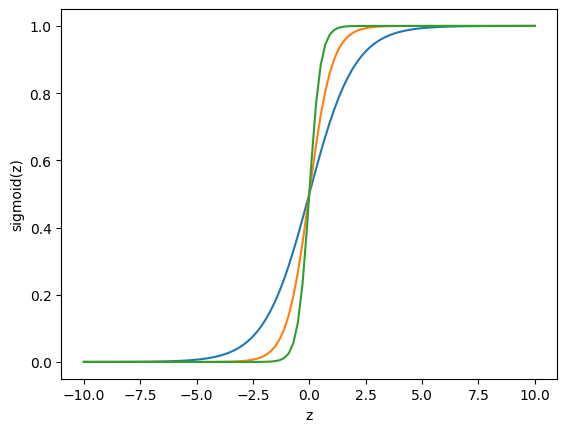

In [148]:
# Your code here
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
alphas = {1, 2, 4}
z = np.linspace(-10, 10, 100) 
for a in alphas:
    plt.plot(z, sigmoid(z*a)) 
    plt.xlabel("z") 
    plt.ylabel("sigmoid(z)")

**Q**: Why is the sigmoid function a suitable choice for the activation function of a generalized linear model?
</br>

**Q**: What influence does the factor $\alpha$ have on the shape of the sigmoid? What does this mean for a logistic regression model (ie, how does the output of the model depend on the norm of the weight vector $\mathbf{w}$)?

### (b) 

Implement the function

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)`

for training logistic regression models using gradient descent (*batch* approach). The function takes a labeled set of learning examples (the matrix of examples `X` and the vector of labels `y`) and returns a $(n+1)$-dimensional vector of weights of type `ndarray`. If `trace=True`, the function additionally returns a list (or matrix) of weight vectors $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generated through all optimization iterations, from 0 to $k$. The optimization should be carried out until the `max_iter` iteration is reached, or when the difference in cross-entropy error between two iterations falls below the `epsilon` value. The `alpha` parameter represents the L2-regularization factor.

We recommend defining the helper function `lr_h(x,w)` which gives a prediction for the example `x` with the given weights `w`. Also, we recommend the function `cross_entropy_error(X,y,w)` which calculates the cross entropy error of the model on the labeled set `(X,y)` with the same weights.

**NB:** Please note that the way the labels ($\{+1,-1\}$ or $\{1,0\}$) are defined is compatible with the calculation of the loss function in the optimization algorithm.

In [156]:
from numpy import linalg

def lr_h(X,w):
    return sigmoid(X @ w, alpha=0)

def cross_entrophy_error(X, y, w, alpha=0):
    h = sigmoid(X @ w)
    N = len(y)
    n = X.shape[0]
    loss = np.mean( (-y * np.log(h)) - (1 - y) * np.log(1 - h))
    L2_reg = (alpha / (2 * n)) * np.sum(w[1:] ** 2)
    return loss + L2_reg
    
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    lambda_ = 0.01
    Xb = np.c_[np.ones(X.shape[0]), X]
    n, d = X.shape
    w = np.zeros(d+1) # +1 because of biais 
    
    if trace:
        w_list = []
    
    for it in range(max_iter):
        h = sigmoid(Xb @ w)
        gradient = (Xb.T @ (h - y)) / n 
        if lambda_ != 0:
            gradient[1:] += (alpha * w[1:]) / n
        w = w - eta * gradient

        if trace:
            w_list.append(w.copy())
 
        if np.linalg.norm(gradient) < epsilon:
            break
        
    if trace: 
        return (w, w_list) 
    else: 
        return w 
    

### (c)

Using the `lr_train` function, train the logistic regression model on the set `seven`, display the resulting boundary between the classes, and calculate the cross-entropy error.

**NB:** Make sure to pass a sufficient number of iterations to the function.

In [152]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [153]:
# Your code here
res = lr_train(seven_X, seven_y)
print(res)

[ 2.05828444 -1.19450687  0.82117034]


**Q:** Which stopping criteria is activated?

**Q:** Why is the resulting cross-entropy error not zero?

**Q:** How would you determine that the optimization procedure has indeed found a hypothesis that minimizes the learning error? What does that depend on?

**Q:** How would you modify the code if you wanted the optimization to be performed by stochastic gradient descent (*online learning*)?

### (d)

Show in one graph the cross-entropy error (logistic loss expectation) and the classification error (loss expectation 0-1) on set `seven` through iterations of the optimization procedure. Use the trace of the weights of the function `lr_train` from task (b) (option `trace=True`). In the second graph, show the cross-entropy error as a function of the number of iterations for different learning rates, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [150]:
from sklearn.metrics import zero_one_loss

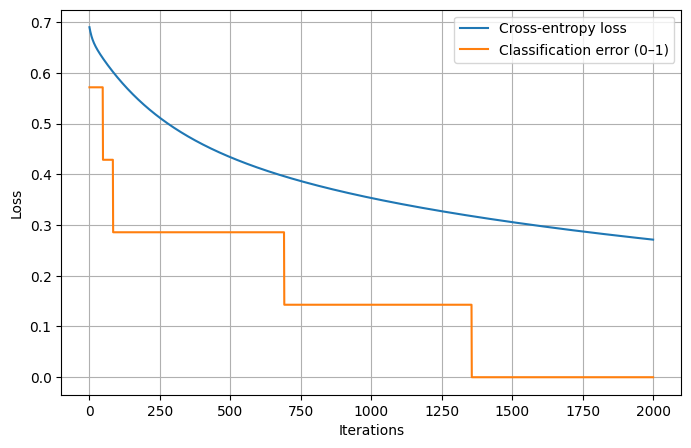

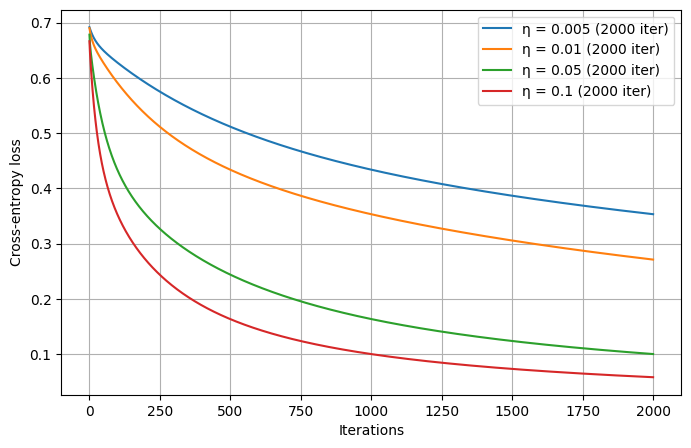

In [157]:
w_final, w_list = lr_train(seven_X, seven_y, max_iter=2000, eta=0.01, trace=True,epsilon=1e-8)
cross_entropies = []
class_errors = []

X_bias = np.c_[np.ones(seven_X.shape[0]), seven_X]

for w in w_list:
    ce = cross_entrophy_error(X_bias, seven_y, w)
    cross_entropies.append(ce)
    
    predictions = (sigmoid(X_bias @ w) >= 0.5).astype(int)
    err = zero_one_loss(seven_y, predictions)
    class_errors.append(err)
    
plt.figure(figsize=(8,5))
plt.plot(cross_entropies, label="Cross-entropy loss")
plt.plot(class_errors, label="Classification error (0–1)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


etas = [0.005, 0.01, 0.05, 0.1]
plt.figure(figsize=(8,5))

for eta in etas:
    _, w_list_eta = lr_train(seven_X, seven_y, eta=eta, trace=True, 
                             max_iter=2000, epsilon=1e-8)
    ce_list = [cross_entrophy_error(X_bias, seven_y, w) for w in w_list_eta]
    plt.plot(ce_list, label=f"η = {eta} ({len(ce_list)} iter)")

plt.xlabel("Iterations")
plt.ylabel("Cross-entropy loss")
plt.legend()
plt.grid(True)
plt.show()


**Q:** Why is the cross-entropy error greater than the classification error? Is this always the case with logistic regression and why?

**Q:** Which learning rate $\eta$ would you choose and why?

### (e)

Familiarize yourself with the [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class that implements logistic regression. Compare the result of that model on set `seven` with the result you get using your own implementation of the algorithm.

**NB:** As the built-in implementation uses more advanced versions of the optimization function, it is very likely that your solutions will not match, but the general performance of the model should. Again, pay attention to the number of iterations and the strength of the regularization.

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, C=1.0, fit_intercept=False)
model.fit(X_bias, seven_y)
y_pred_sklearn = model.predict(X_bias)
print("0-1 loss ", zero_one_loss(seven_y, y_pred_sklearn))

0-1 loss  0.1428571428571429


### 4. Analysis of logistic regression

### (a)

Using the built-in logistic regression implementation, analyse how logistic regression handles outliers. Use the `outlier` set. Show the boundary between classes.

In [94]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

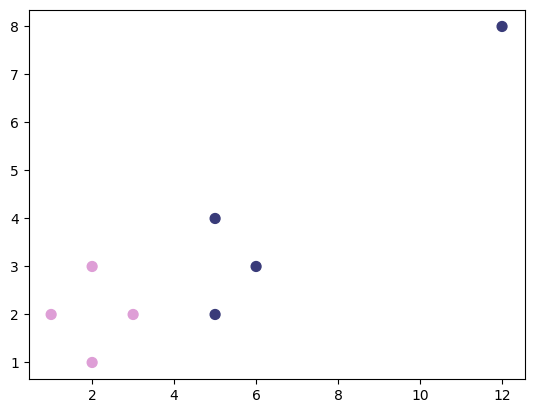

In [99]:
model = LogisticRegression()
model.fit(outlier_X, outlier_y)
pred = model.predict(outlier_X)
plot_2d_clf_problem(outlier_X, pred)


**Q:** Why is the result different from the one obtained by the linear regression classification model from the first task?

### (b)

Train the logistic regression model on the set `seven` and show on two separate graphs, through iterations of the optimization algorithm, (1) the output of the $h(\mathbf{x})$ model for all seven examples and (2) the weight values $w_0$, $w_1$, $w_2$.

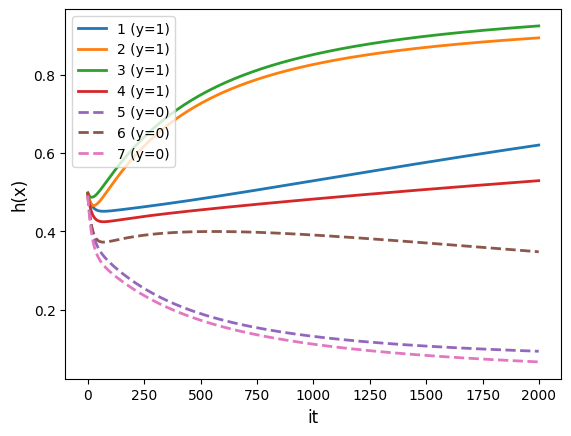

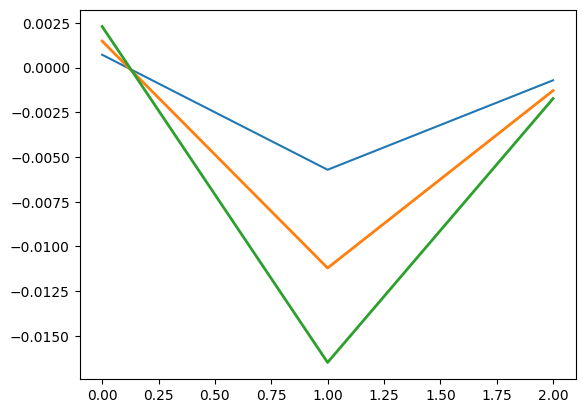

In [193]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

w_final, w_list = lr_train(seven_X, seven_y, max_iter=2000, eta=0.01, trace=True,epsilon=1e-8)
#add bias
X_bias = np.c_[np.ones(seven_X.shape[0]), seven_X]
number_examples = seven_X.shape[0]

hx = []
for i, w in enumerate(w_list):
    hx.append(sigmoid(X_bias @ w))

for i in range(number_examples):
    hx_examples = []
    for j in range(len(hx)):
        hx_examples.append(hx[j][i])
    label = f"{i+1} (y={seven_y[i]})"
    linestyle = '-' if seven_y[i] == 1 else '--'
    plt.plot(hx_examples, label=label, linestyle=linestyle, linewidth=2)

plt.xlabel("it", fontsize=12)
plt.ylabel("h(x)", fontsize=12)
plt.legend()
plt.show()

w0 = w_list[0]
w1 = w_list[1]
w2 = w_list[2]

plt.plot(w0, label="w0=biais")
plt.plot(w1, label="w1", linewidth=2)
plt.plot(w2, label="w2", linewidth=2)
plt.show()

### (c)

Repeat the experiment from subtask (b) using the linearly inseparable data set `unsep`.

In [197]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

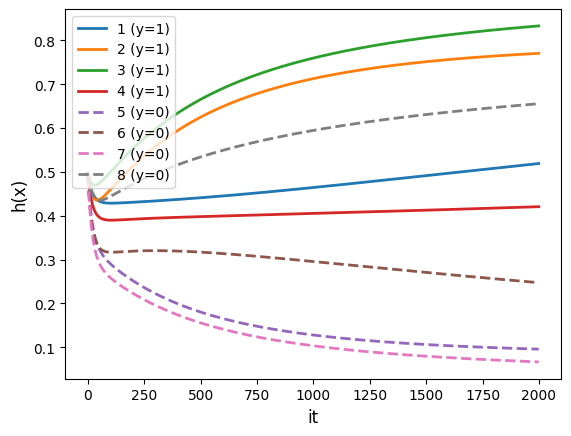

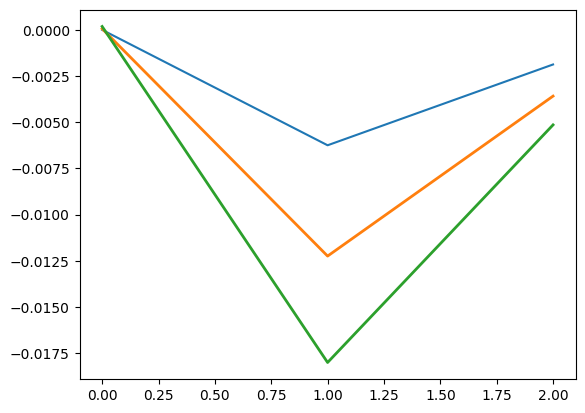

In [198]:

w_final, w_list = lr_train(unsep_X, unsep_y, max_iter=2000, eta=0.01, trace=True,epsilon=1e-8)
#add bias
X_bias = np.c_[np.ones(unsep_X.shape[0]), unsep_X]
number_examples = unsep_X.shape[0]

hx = []
for i, w in enumerate(w_list):
    hx.append(sigmoid(X_bias @ w))

for i in range(number_examples):
    hx_examples = []
    for j in range(len(hx)):
        hx_examples.append(hx[j][i])
    label = f"{i+1} (y={unsep_y[i]})"
    linestyle = '-' if unsep_y[i] == 1 else '--'
    plt.plot(hx_examples, label=label, linestyle=linestyle, linewidth=2)

plt.xlabel("it", fontsize=12)
plt.ylabel("h(x)", fontsize=12)
plt.legend()
plt.show()

w0 = w_list[0]
w1 = w_list[1]
w2 = w_list[2]

plt.plot(w0, label="w0=biais")
plt.plot(w1, label="w1", linewidth=2)
plt.plot(w2, label="w2", linewidth=2)
plt.show()

**Q:** Compare the graphs for the case of linearly separable and linearly non-separable examples and comment on the difference.

### 5. Regularized logistic regression

Train the logistic regression model on the `seven` data set with different L2 regularization factors, $\alpha\in\{0,1,10,100\}$. Show on two separate graphs (1) the cross-entropy error and (2) the L2-norm of the vector $\mathbf{w}$ through the iterations of the optimization algorithm.

In [207]:
from numpy.linalg import norm

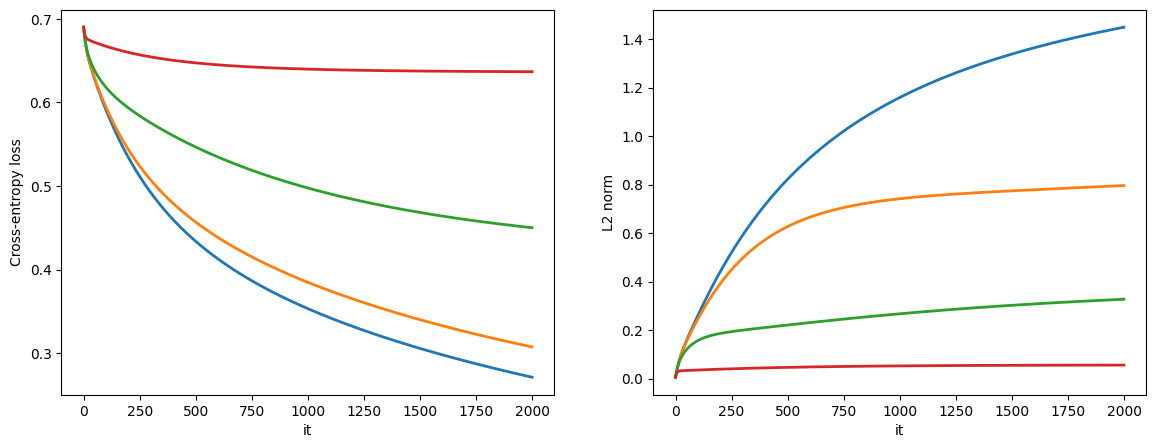

In [209]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
alphas_ = {0, 1, 10, 100}
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for a in alphas_ : 
    w_final, w_list = lr_train(seven_X, seven_y, max_iter=2000, alpha=a, eta=0.01, trace=True,epsilon=1e-8)
    cross_entropies = []
    L2_norm_values = []

    X_bias = np.c_[np.ones(seven_X.shape[0]), seven_X]

    for w in w_list:
        cross_entropies.append(cross_entrophy_error(X_bias, seven_y, w))
        #norm w1, w2 without w0
        w_norm = norm(w[1:]) 
        L2_norm_values.append(w_norm)
    axes[0].plot(cross_entropies, label=f"alpha : {a}", linewidth=2)
    axes[1].plot(L2_norm_values, label=f"alpha : {a}", linewidth=2)
    
axes[0].set_xlabel("it")
axes[0].set_ylabel("Cross-entropy loss")

axes[1].set_xlabel("it")
axes[1].set_ylabel("L2 norm")
plt.show()




**Q:** Are the curves expected and why?

**Q:** What value for $\alpha$ would you choose and why?

Study the function [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generate and display a two-class dataset with a total of $N=100$ two-dimensional ($n=2)$ examples, with two clusters per class (`n_clusters_per_class=2`). It is unlikely that the set generated in this way will be linearly separable, but this is not a problem because we can map the examples to a multidimensional feature space using the class [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), as we did with linear regression in the first lab exercise. Train a logistic regression model using polynomial functions of degree $d=2$ and $d=3$ as mapping functions. Display the obtained boundaries between classes. You can use your own implementation, but for speed it is recommended to use `linear_model.LogisticRegression`. Choose the regularization factor as desired.

**NB:** As before, use the function `plot_2d_clf_problem` to display the boundary between classes. Pass the original data set to the function as arguments, and make the mapping into the feature space within the call of the function `h`, which makes the prediction, as follows:

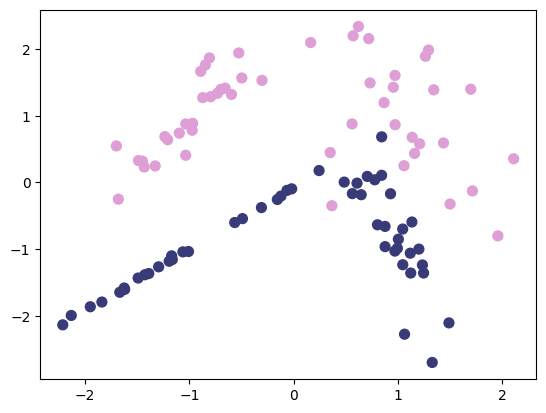

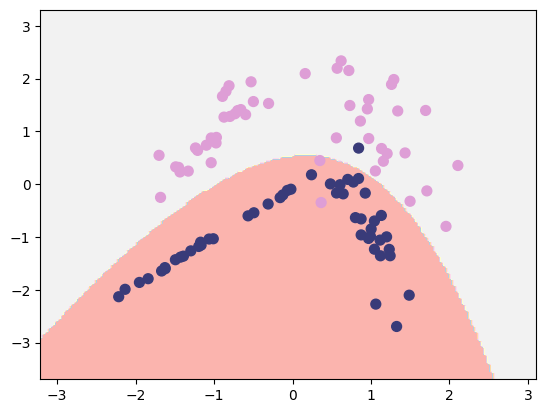

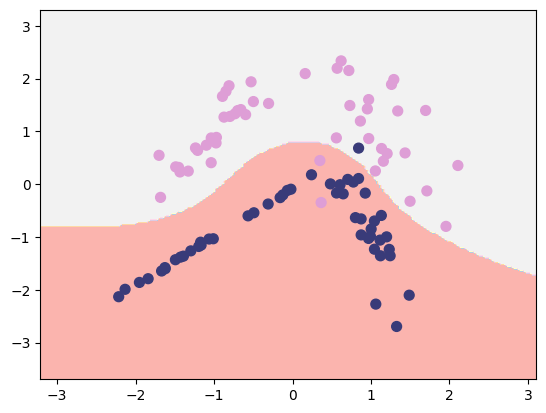

In [224]:
from sklearn.preprocessing import PolynomialFeatures
X, y = make_classification(n_features=2, n_redundant=0,n_clusters_per_class=2)
# show data set
plot_2d_clf_problem(X, y)
plt.show()

# train and show with d == 2 
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
model_d2 = LogisticRegression(C=1.0, max_iter=1000)
model_d2.fit(X_poly2, y)

plot_2d_clf_problem(X, y, lambda x : model_d2.predict(poly2.transform(x)))
plt.show()

# train and show with d == 3 
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)
model_d3 = LogisticRegression(C=1.0, max_iter=1000)
model_d3.fit(X_poly3, y)

plot_2d_clf_problem(X, y, lambda x : model_d3.predict(poly3.transform(x)))
plt.show()

In [ ]:
from sklearn.datasets import make_classification

# Your code here

**Q:** What degree of polynomial would you use and why? Is this selection related to the selection of the regularization factor $\alpha$? Why?